## Select the right threshold values using ROC curve.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split

In [5]:
df = make_classification()

In [14]:
df.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [15]:
df.keys()

AttributeError: 'tuple' object has no attribute 'keys'

In [16]:
type(df)

tuple

In [17]:
X,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [19]:
X.shape

(2000, 20)

In [21]:
y.shape

(2000,)

In [25]:
sum(y==0)

997

In [26]:
sum(y==1)

1003

In [27]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Random forests

In [32]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_train_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc score : {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc score: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

RF train roc-auc score : 0.9999999999999999
RF test roc-auc score: 0.9812555555555555


In [33]:
y_train_pred ## First one is probability of getting 1 and second one of 0 or vice versa 

array([[1.  , 0.  ],
       [0.95, 0.05],
       [0.03, 0.97],
       ...,
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.3 , 0.7 ]])

## Logistic Regression 

In [34]:
## Apply RandomForestClassifier
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_train_pred = log_model.predict_proba(X_train)
print('Logistic train roc-auc score : {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = log_model.predict_proba(X_test)
print('Logistic test roc-auc score: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

Logistic train roc-auc score : 0.9863568922694498
Logistic test roc-auc score: 0.9885777777777777


## AdaBOOST Classifier 

In [35]:
## Apply RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,y_train)
y_train_pred = ada_model.predict_proba(X_train)
print('Ada train roc-auc score : {}'.format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred = ada_model.predict_proba(X_test)
print('Ada test roc-auc score: {}'.format(roc_auc_score(y_test,y_test_pred[:,1])))

Ada train roc-auc score : 0.9975081174960356
Ada test roc-auc score: 0.9826111111111111


## KNN Classifier 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Knn train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Knn test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Knn train roc-auc: 0.981670071491109
Knn test roc-auc: 0.9426111111111111


### Now we will focus on selecting the best threshold for maximum accuracy 

In [39]:
pred=[]
for model in [rf_model, log_model, ada_model , knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis = 1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9844777777777778


In [40]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,1.00,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.58,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.01,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [42]:
final_prediction

0      0.880262
1      0.120823
2      0.826283
3      0.755353
4      0.562447
         ...   
595    0.123840
596    0.112845
597    0.879197
598    0.163217
599    0.837357
Length: 600, dtype: float64

In [44]:
## Calculate the Roc Curve

fpr,tpr,thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90658893, 0.90577475, 0.80739711,
       0.80662833, 0.80384271, 0.8030558 , 0.78630736, 0.78321156,
       0.76988614, 0.76787124, 0.72175756, 0.71637362, 0.66506113,
       0.66493537, 0.61029968, 0.60864346, 0.60212652, 0.58986186,
       0.57399047, 0.57300386, 0.56244674, 0.56219563, 0.55745356,
       0.55139283, 0.52615858, 0.48366892, 0.45740225, 0.44472765,
       0.4371034 , 0.39155357, 0.38629719, 0.34636723, 0.34586612,
       0.23654122, 0.23640421, 0.22755139, 0.22646893, 0.20602808,
       0.20098417, 0.11795384, 0.1178351 , 0.10748954])

In [46]:
from sklearn.metrics import accuracy_score
accuracy = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy.append(accuracy_score(y_test,y_pred,normalize=True))

accuracy = pd.concat([pd.Series(thresholds), pd.Series(accuracy)],axis=1)

accuracy.columns = ['Thresholds' , 'Accuracy']
accuracy.sort_values(by='Accuracy', ascending = False , inplace = True)
accuracy.head()

,Thresholds,Accuracy
29,0.444728,0.961667
30,0.437103,0.960000
28,0.457402,0.960000
27,0.483669,0.958333
26,0.526159,0.958333


In [47]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='orange',label='ROC')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

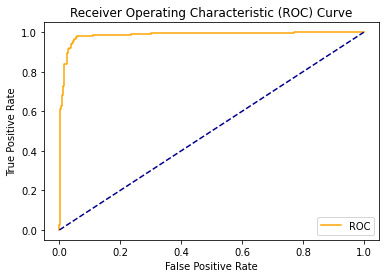

In [48]:
plot_roc_curve(fpr,tpr)